# **Frontier Technologies Learning Collaborative​**
## **Week 3: Classification**

### **Question: What kind of data more suitable for a classification task?**

**A)** Quantative Data

**B)** Continuous Data

**C)** Categorical Data




In [ ]:
Answer: C

### **Question: Which of the visual represent the Sigmoid Function? (A, B, C)**

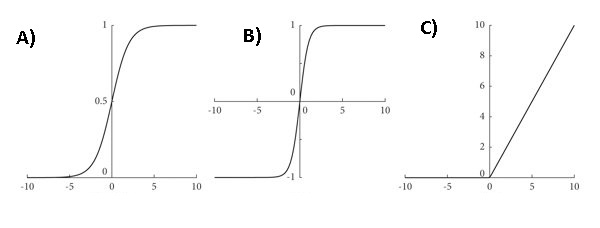

In [ ]:
Answer: A

### **Question: Please write sigmoid function that receives a value and returns the output after sigmoid function calculation**

**The sigmoid function:**

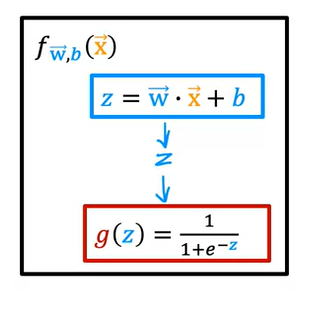

In [ ]:
def sigmoid(z):

  # formula
  s=1 / (1 + np.exp(-z))

  return s

### **Question: Please visualize given sample dataset**

Expected output(please do not consider the colors or the theme of the sample visuals, main purpose is to visualize data points):



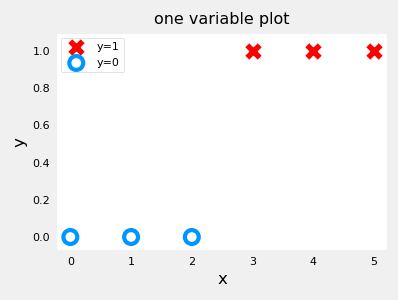

In [ ]:
import numpy as np

In [ ]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

## **Classification Task: Finding smokers by body signals**

### **The dataset**

This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals.

**Data shape: (55692, 27)**

*   **ID:** index
*   **gender**
*   **age:** 5-years gap
*   **height(cm)**
*   **weight(kg)**
*   **waist(cm):** Waist circumference length
*   **eyesight(left)**
*   **eyesight(right)**
*   **hearing(left)**
*   **hearing(right)**
*   **systolic:** Blood pressure
*   **relaxation:** Blood pressure
*   **fasting blood sugar**
*   **Cholesterol: **total
*   **triglyceride**
*   **HDL:** cholesterol type
*   **LDL:** cholesterol type
*   **hemoglobin**
*   **Urine protein**
*   **serum creatinine**
*   **AST:** glutamic oxaloacetic transaminase type
*   **ALT:** glutamic oxaloacetic transaminase type
*   **Gtp:** γ-GTP
*   **oral:** Oral Examination status
*   **dental caries**
*   **tartar:** tartar status
*   **smoking**

### **1. Import required packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### **2. Import dataset**

In [ ]:
df = pd.read_csv('data/smoking.csv')


### **3. Explore dataset**

*   Info
*   Shape
*   Do  visualization on features, (i.e. gender distribution on a pie chart, or histograms on other kind of features)
*   Identify valuable features for ML training (observe correlations between smokers and not smokers based on the features)
*   Preapre the dataset for ML model (converting categorical values to numerical variables - labelencoding)

In [ ]:
# Explore the dataset
print(df.info())
print(df.shape)

# Visualize features
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df, hue='smoking')
plt.title('Gender Distribution by Smoking Status')
plt.show()

plt.figure(figsize=(10, 6))
df['age'].plot(kind='hist')
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
df[['height(cm)', 'weight(kg)']].plot(kind='hist', alpha=0.5)
plt.title('Height and Weight Distribution')
plt.show()

# Identify valuable features for ML training
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Prepare the dataset for ML model
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['oral'] = le.fit_transform(df['oral'])
df['tartar'] = le.fit_transform(df['tartar'])
df['smoking'] = le.fit_transform(df['smoking'])

### **4. Build & Train Logistic Regression model (sklearn)**


*   Split the dataset into test and training sets (X_train, X_test, y_train, y_test)
*   Initiate the logistic regression model
*   Start training (you may also adjust parameters)




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
# please do add other packages in need

In [ ]:
X = df.drop('smoking', axis=1)
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

### **5. Evaluate the LR model with the test dataset**

- Classification report

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

### **6. Visualize the classification results**

In [ ]:
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))